In [1]:
#Import dependencies into juputer notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error 

import pickle

In [2]:
#Import dataset with Gerogia real estate and view table

df = pd.read_csv('./resources/RealEstate_Georgia.csv')
df.head()

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,31503-110785431,16,17,55064,USA,2021-07-12,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Brantley County
1,1,31503-76611082,16,18,55064,USA,2021-07-12,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Ware County
2,2,31503-93126153,16,19,55064,USA,2021-07-10,0,0,Listed for sale,...,1,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Ware County
3,3,31503-110785598,16,20,55064,USA,2021-07-09,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Brantley County
4,4,31503-2101070583,16,21,55064,USA,2021-07-06,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Ware County


In [3]:
#ANALYSIS AND CLEANING OF NUMERICAL DATA
#View datatypes in table for EDA, cleaning, and to see numerical data to be used

df.dtypes[df.dtypes!='object']

Unnamed: 0              int64
stateId                 int64
countyId                int64
cityId                  int64
is_bankOwned            int64
is_forAuction           int64
time                  float64
price                 float64
pricePerSquareFoot    float64
yearBuilt               int64
zipcode               float64
longitude             float64
latitude              float64
hasBadGeocode           int64
livingArea            float64
livingAreaValue       float64
bathrooms             float64
bedrooms              float64
buildingArea          float64
parking                 int64
garageSpaces          float64
hasGarage               int64
pool                    int64
spa                     int64
isNewConstruction       int64
hasPetsAllowed          int64
dtype: object

In [4]:
#CLEANING: Dropping duplicates 

df.drop_duplicates()
df_cln = df.loc[(df.is_bankOwned == False) & (df.is_forAuction == False)& (df.homeType != 'LOT')]
df_cln

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,31503-110785431,16,17,55064,USA,2021-07-12,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Brantley County
1,1,31503-76611082,16,18,55064,USA,2021-07-12,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Ware County
2,2,31503-93126153,16,19,55064,USA,2021-07-10,0,0,Listed for sale,...,1,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Ware County
3,3,31503-110785598,16,20,55064,USA,2021-07-09,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Brantley County
5,5,31503-227421330,16,22,55064,USA,2021-07-05,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Ware County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13784,13784,30054-69867027,16,128655,8877,USA,2021-07-05,0,0,Listed for sale,...,1,0.0,0,One,0,0,0,0,SINGLE_FAMILY,Newton County
13787,13787,30054-49887899,16,128658,8877,USA,2021-07-02,0,0,Price change,...,0,0.0,0,One,1,0,0,0,SINGLE_FAMILY,Walton County
13801,13801,30054-69887935,16,128672,8877,USA,2021-06-18,0,0,Listed for sale,...,1,2.0,1,Two,0,0,0,0,SINGLE_FAMILY,Newton County
13802,13802,30054-69871474,16,128673,8877,USA,2021-06-18,0,0,Price change,...,1,2.0,1,One,1,1,0,0,SINGLE_FAMILY,Newton County


In [5]:
#CLEANING: Change of date from string to a month integer.

df_cln['Month'] = df_cln['datePostedString'].str[0].astype('int')
df_cln

<ipython-input-5-197b1dbfb2c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cln['Month'] = df_cln['datePostedString'].str[0].astype('int')


,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county,Month
0,0,31503-110785431,16,17,55064,USA,2021-07-12,0,0,Listed for sale,...,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Brantley County,2
1,1,31503-76611082,16,18,55064,USA,2021-07-12,0,0,Listed for sale,...,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Ware County,2
2,2,31503-93126153,16,19,55064,USA,2021-07-10,0,0,Listed for sale,...,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Ware County,2
3,3,31503-110785598,16,20,55064,USA,2021-07-09,0,0,Listed for sale,...,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Brantley County,2
5,5,31503-227421330,16,22,55064,USA,2021-07-05,0,0,Listed for sale,...,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Ware County,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13784,13784,30054-69867027,16,128655,8877,USA,2021-07-05,0,0,Listed for sale,...,0.0,0,One,0,0,0,0,SINGLE_FAMILY,Newton County,2
13787,13787,30054-49887899,16,128658,8877,USA,2021-07-02,0,0,Price change,...,0.0,0,One,1,0,0,0,SINGLE_FAMILY,Walton County,2
13801,13801,30054-69887935,16,128672,8877,USA,2021-06-18,0,0,Listed for sale,...,2.0,1,Two,0,0,0,0,SINGLE_FAMILY,Newton County,2
13802,13802,30054-69871474,16,128673,8877,USA,2021-06-18,0,0,Price change,...,2.0,1,One,1,1,0,0,SINGLE_FAMILY,Newton County,2


In [6]:
#CLEANING: Dropping columns not needed for analysis

df_cln = df_cln.loc[(df_cln.homeType == 'SINGLE_FAMILY') & (df_cln.yearBuilt < 2022) & (df_cln.yearBuilt > 1800) ]
drop_columns = ['Unnamed: 0', 'id', 'stateId', 'countyId', 'cityId', 'country',
       'is_bankOwned', 'is_forAuction', 'longitude', 'latitude', 'event', 'time','state',
       'streetAddress', 'hasBadGeocode',
       'description', 'currency', 'livingAreaValue',
       'lotAreaUnits', 'buildingArea', 
       'garageSpaces', 'hasPetsAllowed','datePostedString']
df_ready = df_cln.drop(columns=drop_columns).dropna()


In [7]:
#CLEANING: Dropping of columns

drop_columns2 = ['city', 'levels', 'pricePerSquareFoot', 'parking']

df_uml = df_ready.drop(columns=drop_columns2).dropna()

df_uml.reset_index(drop=True, inplace=True)
df_uml

,price,yearBuilt,zipcode,livingArea,bathrooms,bedrooms,hasGarage,pool,spa,isNewConstruction,homeType,county,Month
0,169900.0,1985,31503.0,2302.0,3.0,4.0,0,0,0,0,SINGLE_FAMILY,Brantley County,2
1,159000.0,1910,31503.0,2864.0,2.0,4.0,0,0,0,0,SINGLE_FAMILY,Ware County,2
2,45000.0,1945,31503.0,728.0,1.0,1.0,0,0,0,0,SINGLE_FAMILY,Ware County,2
3,165000.0,1971,31503.0,1620.0,2.0,2.0,0,0,0,0,SINGLE_FAMILY,Brantley County,2
4,173500.0,1980,31503.0,1512.0,2.0,3.0,0,0,0,0,SINGLE_FAMILY,Ware County,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8050,100000.0,1986,30054.0,1081.0,2.0,3.0,0,0,0,0,SINGLE_FAMILY,Newton County,2
8051,254900.0,1978,30054.0,1632.0,2.0,3.0,0,1,0,0,SINGLE_FAMILY,Walton County,2
8052,350000.0,2002,30054.0,2665.0,4.0,5.0,1,0,0,0,SINGLE_FAMILY,Newton County,2
8053,379000.0,2000,30054.0,1960.0,3.0,3.0,1,1,1,0,SINGLE_FAMILY,Newton County,2


In [8]:
#CLEANING: Sorting of columns ato be used for analysis

df_num = pd.get_dummies(df_uml)
df_num.sort_values("yearBuilt",ascending = True)

,price,yearBuilt,zipcode,livingArea,bathrooms,bedrooms,hasGarage,pool,spa,isNewConstruction,...,county_Warren County,county_Washington County,county_Wayne County,county_Wheeler County,county_White County,county_Whitfield County,county_Wilcox County,county_Wilkes County,county_Wilkinson County,county_Worth County
1896,439000.0,1806,31032.0,2938.0,3.0,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6706,500000.0,1810,30660.0,0.0,2.0,4.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
918,699000.0,1810,30642.0,0.0,2.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7229,725000.0,1813,30673.0,5084.0,7.0,5.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7233,248000.0,1816,30673.0,4505.0,4.0,5.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,306900.0,2021,30507.0,1841.0,3.0,3.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7368,304900.0,2021,30507.0,1841.0,3.0,3.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7369,319900.0,2021,30507.0,2218.0,3.0,4.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2385,365000.0,2021,30541.0,1176.0,2.0,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# EXPLORING: Checking for missing Values. Since time has 19 missing values but it is not being used in predictions, no further need to convert NaN to 0 aligorithms. 

df.select_dtypes(exclude=['object']).isnull().sum()

Unnamed: 0             0
stateId                0
countyId               0
cityId                 0
is_bankOwned           0
is_forAuction          0
time                  19
price                  0
pricePerSquareFoot     0
yearBuilt              0
zipcode                0
longitude              0
latitude               0
hasBadGeocode          0
livingArea             0
livingAreaValue        0
bathrooms              0
bedrooms               0
buildingArea           0
parking                0
garageSpaces           0
hasGarage              0
pool                   0
spa                    0
isNewConstruction      0
hasPetsAllowed         0
dtype: int64

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'stateId'}>,
        <AxesSubplot:title={'center':'countyId'}>,
        <AxesSubplot:title={'center':'cityId'}>,
        <AxesSubplot:title={'center':'is_bankOwned'}>],
       [<AxesSubplot:title={'center':'is_forAuction'}>,
        <AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'pricePerSquareFoot'}>,
        <AxesSubplot:title={'center':'yearBuilt'}>],
       [<AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'hasBadGeocode'}>,
        <AxesSubplot:title={'center':'livingArea'}>],
       [<AxesSubplot:title={'center':'livingAreaValue'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'buildingArea'}

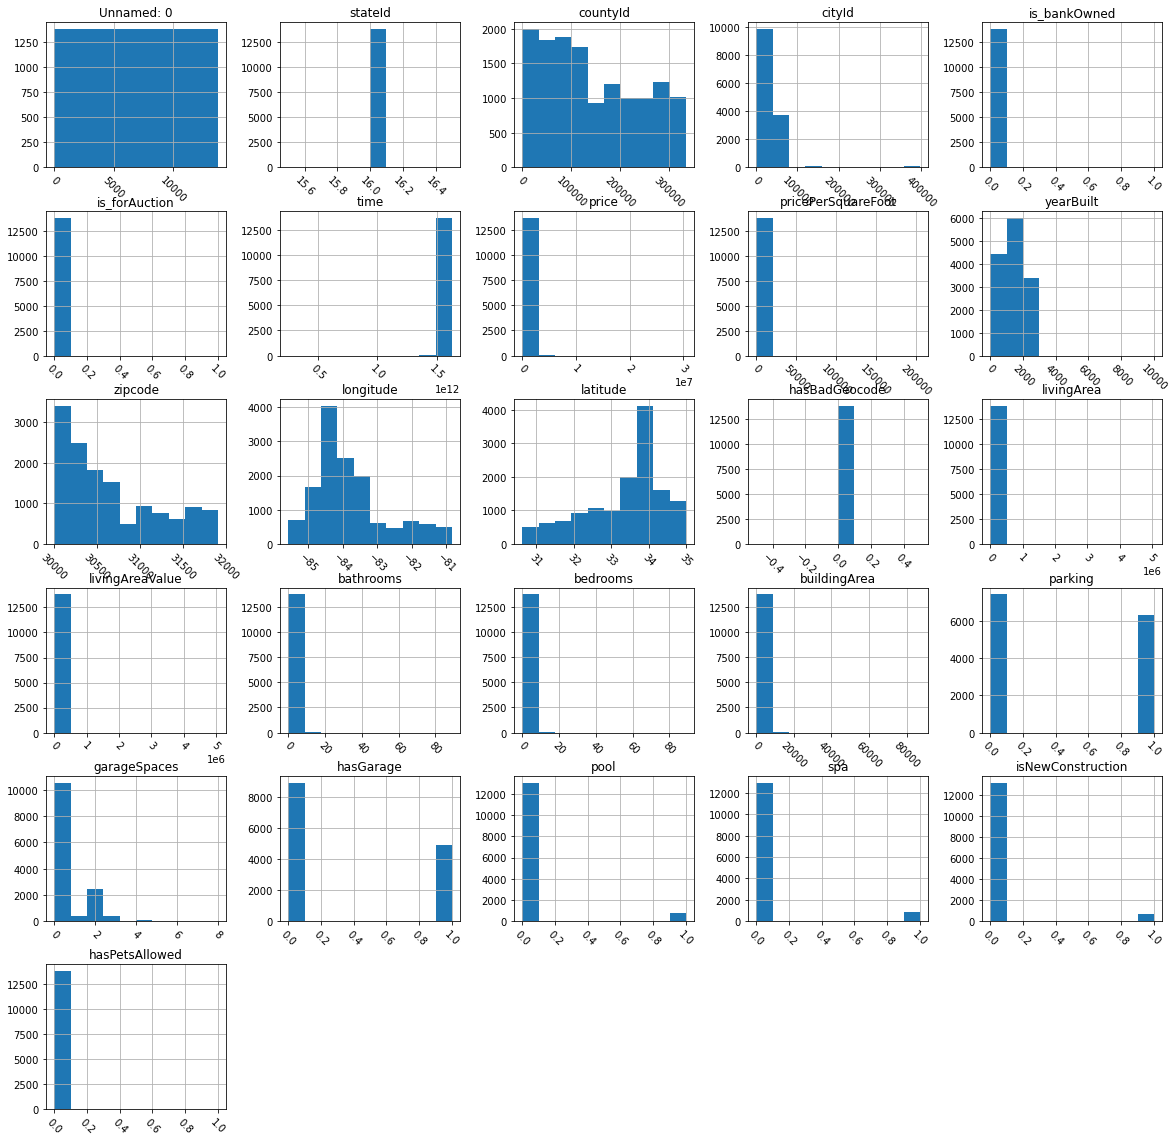

In [10]:
#EXPLORING: Histograms showing numerical data from graph and to determine distribution (skew) of target variable

df.hist(figsize=(20,20), xrot=-45)

In [11]:
# EXPLORING: Checking for outliers. Based on the histograms, the city ID indicates possible outliers. 

df.county.sort_values(ascending=False)



10166      Worth County
7046       Worth County
3011       Worth County
7149       Worth County
7148       Worth County
              ...      
10339    Appling County
10340    Appling County
10333    Appling County
10332    Appling County
10330    Appling County
Name: county, Length: 13804, dtype: object

<AxesSubplot:xlabel='zipcode'>

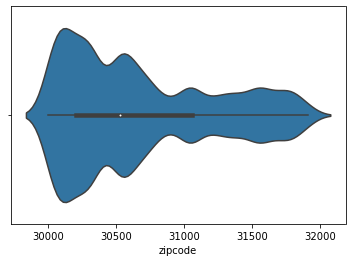

In [12]:
# EXPLORING: Based on the above histograms the zipcode has a right-tailed distribution which is also seen in the violin plot

sns.violinplot(data=df, x='zipcode')

<AxesSubplot:xlabel='price'>

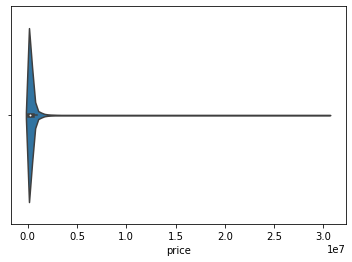

In [13]:
#EXPLORING: Based on the above histograms although price does not have a right-tailed distribution, the violin shape was plotted to see distribution since this is a variable required for analysis. 

sns.violinplot(data=df, x='price')

In [14]:
# EXPLORING: Median price value of homes. 

df.price.median()

#Based on information from attomdata (https://attomdata.com) The U.S. median home price increased 6.2 percent in 2019, hitting an all-time high of $258,000. The annual home-price appreciation in 2019 topped the 4.5 percent rise in 2018 compared to 2017, but was down from the 7.1 percent increase in 2017 compared to 2016.
#Hence,the houses amassed in this REIT portfolio appears to be a bit more downtown on average.

247000.0

In [15]:
scaler = StandardScaler().fit(df_num)
data_ready = scaler.transform(df_num)
data_ready

array([[-0.50389446,  0.11038133,  1.53199893, ..., -0.04598863,
        -0.02730264, -0.04172621],
       [-0.52563132, -2.34747579,  1.53199893, ..., -0.04598863,
        -0.02730264, -0.04172621],
       [-0.75297097, -1.2004758 ,  1.53199893, ..., -0.04598863,
        -0.02730264, -0.04172621],
       ...,
       [-0.1447377 ,  0.66749561, -1.03020317, ..., -0.04598863,
        -0.02730264, -0.04172621],
       [-0.08690569,  0.60195276, -1.03020317, ..., -0.04598863,
        -0.02730264, -0.04172621],
       [-0.16886761,  0.66749561, -1.03020317, ..., -0.04598863,
        -0.02730264, -0.04172621]])

In [16]:
pca = PCA(n_components=0.90)
data_pca = pca.fit_transform(data_ready)
data_pca.shape

(8055, 136)

In [17]:
pvr = pca.explained_variance_ratio_
print (pvr)

[0.02360025 0.01251086 0.00991975 0.00766342 0.00726765 0.00702819
 0.00691671 0.0068773  0.00679733 0.00674372 0.00666929 0.00659623
 0.00655174 0.00654066 0.00650949 0.00650337 0.00648967 0.00648793
 0.00648577 0.00648231 0.00647077 0.00646614 0.00646549 0.00646098
 0.00645807 0.00645316 0.00645164 0.00644892 0.00644645 0.00644496
 0.00644179 0.00643756 0.00643354 0.0064319  0.0064301  0.0064281
 0.00642625 0.00642444 0.00642187 0.00642047 0.00641813 0.00641751
 0.006416   0.00641452 0.00641384 0.00641254 0.00640986 0.00640828
 0.00640663 0.00640565 0.00640515 0.00640481 0.00640388 0.00640296
 0.006401   0.00640064 0.00639969 0.00639875 0.00639817 0.00639754
 0.00639657 0.00639559 0.00639514 0.00639503 0.0063942  0.00639336
 0.00639324 0.00639288 0.00639188 0.00639179 0.00639122 0.00639103
 0.00639079 0.00639025 0.00638987 0.00638975 0.00638937 0.0063891
 0.00638878 0.00638822 0.00638787 0.00638724 0.00638683 0.00638671
 0.00638644 0.00638587 0.00638562 0.00638516 0.00638506 0.006384

In [18]:
tsne = TSNE(learning_rate=100)
tsne_data = tsne.fit_transform(data_pca)
tsne_data.shape

(8055, 2)

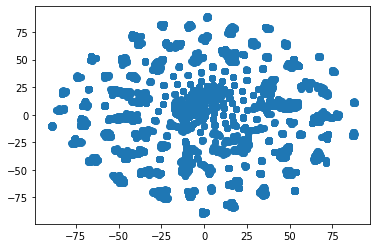

In [19]:
#plotting the results of t-SNE
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()

In [20]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(data_ready)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,1.264635e+06
1,2,1.245791e+06
2,3,1.236563e+06
3,4,1.229010e+06
4,5,1.220922e+06
5,6,1.210775e+06
6,7,1.203523e+06
7,8,1.195639e+06
8,9,1.186480e+06
9,10,1.178877e+06


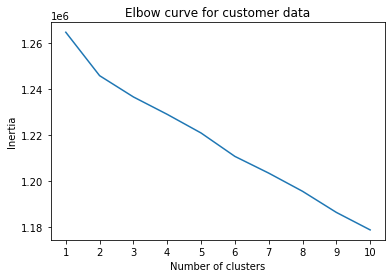

In [21]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [22]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=42)
    # Train the model
    model.fit(data)
    # Predict clusters
    predictions = model.predict(data)
    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_
    return data


In [23]:
clusters = get_clusters(4, df_num)
labels = clusters["class"]

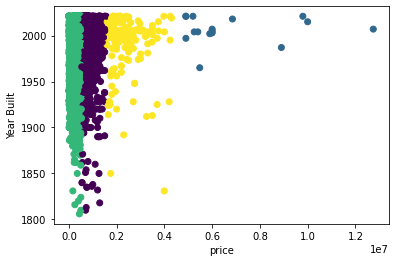

In [24]:
def show_clusters(df):
    plt.scatter(df["price"], df["yearBuilt"], c = df["class"])
    plt.xlabel('price')
    plt.ylabel('Year Built')
    plt.show()

show_clusters(clusters)

In [25]:
df_num.loc[df_num['class']==3]


,price,yearBuilt,zipcode,livingArea,bathrooms,bedrooms,hasGarage,pool,spa,isNewConstruction,...,county_Washington County,county_Wayne County,county_Wheeler County,county_White County,county_Whitfield County,county_Wilcox County,county_Wilkes County,county_Wilkinson County,county_Worth County,class
109,1850000.0,2001,30522.0,4535.0,3.0,4.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
261,2499000.0,2008,30187.0,6422.0,8.0,6.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3
275,2500000.0,2004,30082.0,9412.0,8.0,5.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3
463,2429995.0,2007,30097.0,10321.0,9.0,6.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3
517,2347315.0,1987,30620.0,1122.0,3.0,3.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8040,1795000.0,1936,30306.0,0.0,5.0,4.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3
8041,1995000.0,1920,30306.0,4900.0,5.0,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8044,2200000.0,2002,30306.0,5599.0,5.0,5.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8045,1725000.0,1925,30306.0,4670.0,4.0,4.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3


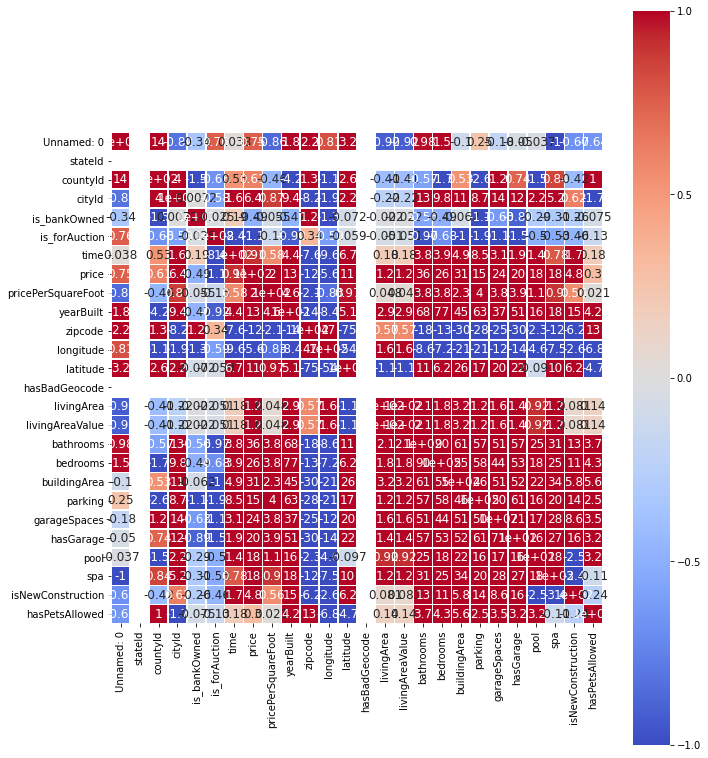

In [26]:
#ANALYSING: Creation of correlation heat map for numerical values.

f, ax = plt.subplots(figsize=(11, 15))

heatmap = sb.heatmap(df.corr()*100,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .9,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
#ax.set_yticklabels(corr_matrix.columns, rotation = 0)
#ax.set_xticklabels(corr_matrix.columns)

#sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

# mask out upper triangle
#mask = np.zeros_like(df.corr(), dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
# heatmap
#sb.heatmap(df.corr()*100, 
          # cmap='RdBu_r', 
          # annot = True, 
          # mask = mask)

In [27]:
#ANALYSIS AND CLEANING OF CATEGORICAL DATA 
#EDA for categorical data

df.dtypes[df.dtypes=='object']

id                  object
country             object
datePostedString    object
event               object
city                object
state               object
streetAddress       object
description         object
currency            object
lotAreaUnits        object
levels              object
homeType            object
county              object
dtype: object

In [28]:
df.homeType.value_counts()

SINGLE_FAMILY    8111
LOT              4529
TOWNHOUSE         474
CONDO             428
MULTI_FAMILY      262
Name: homeType, dtype: int64

In [29]:
df.livingArea.value_counts()

0.0       5397
1200.0      36
3000.0      30
1400.0      28
2100.0      27
          ... 
8017.0       1
3162.0       1
4810.0       1
2781.0       1
3842.0       1
Name: livingArea, Length: 3137, dtype: int64

In [30]:
df.bedrooms.value_counts()

0.0     4682
3.0     3835
4.0     2532
5.0     1083
2.0     1026
6.0      349
1.0      178
7.0       65
8.0       34
9.0        7
10.0       4
11.0       2
14.0       2
89.0       1
21.0       1
15.0       1
32.0       1
12.0       1
Name: bedrooms, dtype: int64

In [31]:
df.select_dtypes(include=['object']).isnull().sum()

id                   0
country              0
datePostedString     1
event                0
city                 0
state                0
streetAddress        0
description         99
currency             0
lotAreaUnits         0
levels               0
homeType             0
county               0
dtype: int64

In [32]:
for feat in df.select_dtypes(include=['object']):
    df[feat] = df[feat].fillna('Missing')

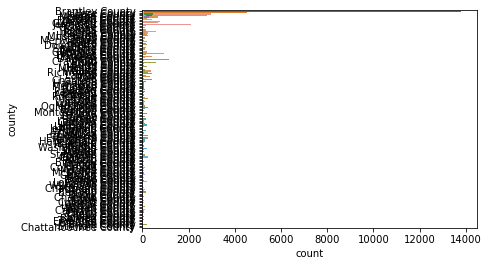

In [33]:
for feat in df.dtypes[df.dtypes=='object'].index:
   sb.countplot(y=feat, data=df)


In [ ]:
for feat in df.dtypes[df.dtypes=='object'].index:
   sb.boxplot(data=df, x = 'price', y = '{}'.format(feat))

KeyboardInterrupt: 

In [35]:
df.groupby('county').agg(['mean','median'])

Unnamed: 0          stateId              countyId  \
                          mean   median    mean median           mean   
county                                                                  
Appling County     9198.750000  10326.5      16     16   80339.718750   
Atkinson County    3741.000000   4432.0      16     16  133588.200000   
Bacon County       3983.538462   3729.0      16     16  142528.846154   
Baldwin County     6448.164179   5930.0      16     16  221971.925373   
Banks County       7631.156250   6149.0      16     16  164944.250000   
...                        ...      ...     ...    ...            ...   
Whitfield County   7161.763975   3365.0      16     16  100633.807453   
Wilcox County     10627.250000  11332.5      16     16   57313.000000   
Wilkes County      9905.766667  12408.5      16     16  118554.000000   
Wilkinson County   9080.900000  10682.0      16     16  139262.100000   
Worth County       7385.121212   7137.0      16     16  223480.060606   

                                  cityId          is_bankOwned         ...  \
                    median          mean   median         mean median  ...   
county                                                                 ...   
Appling County     10914.5   9347.593750  10279.0          0.0      0  ...   
Atkinson County   157919.0  19776.400000  14650.0          0.0      0  ...   
Bacon County      134607.0  49058.384615  48953.0          0.0      0  ...   
Baldwin County    205991.0   8621.119403   5958.0          0.0      0  ...   
Banks County      160528.5  20111.218750  16738.0          0.0      0  ...   
...                    ...           ...      ...          ...    ...  ...   
Whitfield County   99667.0  36093.496894  38130.0          0.0      0  ...   
Wilcox County      37576.5  31615.125000  20205.0          0.0      0  ...   
Wilkes County      76867.5  27894.600000  27782.0          0.0      0  ...   
Wilkinson County  125985.5  18480.700000  10846.0          0.0      0  ...   
Worth County      246456.0  33728.878788  34217.0          0.0      0  ...   

                 hasGarage             pool              spa         \
                      mean median      mean median      mean median   
county                                                                
Appling County    0.062500    0.0  0.156250      0  0.000000      0   
Atkinson County   0.000000    0.0  0.000000      0  0.000000      0   
Bacon County      0.076923    0.0  0.076923      0  0.000000      0   
Baldwin County    0.059701    0.0  0.029851      0  0.000000      0   
Banks County      0.343750    0.0  0.046875      0  0.078125      0   
...                    ...    ...       ...    ...       ...    ...   
Whitfield County  0.118012    0.0  0.074534      0  0.043478      0   
Wilcox County     0.000000    0.0  0.000000      0  0.000000      0   
Wilkes County     0.133333    0.0  0.033333      0  0.033333      0   
Wilkinson County  0.200000    0.0  0.100000      0  0.100000      0   
Worth County      0.000000    0.0  0.060606      0  0.000000      0   

                 isNewConstruction        hasPetsAllowed         
                              mean median           mean median  
county                                                           
Appling County            0.000000      0            0.0      0  
Atkinson County           0.000000      0            0.0      0  
Bacon County              0.000000      0            0.0      0  
Baldwin County            0.014925      0            0.0      0  
Banks County              0.062500      0            0.0      0  
...                            ...    ...            ...    ...  
Whitfield County          0.006211      0            0.0      0  
Wilcox County             0.000000      0            0.0      0  
Wilkes County             0.000000      0            0.0      0  
Wilkinson County          0.000000      0            0.0      0  
Worth County              0.000000      0          

In [36]:
pipelines = {
    'lasso' : make_pipeline(StandardScaler(),
              Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(),
              Ridge(random_state=123)),
    'enet' :  make_pipeline(StandardScaler(),
              ElasticNet(random_state=123)),
    'rf' :    make_pipeline(
              RandomForestRegressor(random_state=123)),
    'gb' :    make_pipeline(
              GradientBoostingRegressor(random_state=123))
}

In [37]:
lasso_hyperparameters = {
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
ridge_hyperparameters = {
    'ridge__alpha' : [0.001, 0.005, 0.01, 0.1, 0.5, 1, 5, 10]}
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10], 
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]}

In [38]:
rf_hyperparameters = {
     'randomforestregressor__n_estimators' : [100, 200],
     'randomforestregressor__max_features' : ['auto', 'sqrt', 0.33],
     'randomforestregressor__min_samples_leaf' : [1, 3, 5, 10]}

In [39]:
gb_hyperparameters = {
      'gradientboostingregressor__n_estimators' : [100, 200],
      'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
      'gradientboostingregressor__max_depth' : [1, 3, 5]}

In [40]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )

NameError: name 'fitted_models' is not defined

In [ ]:
for name, model in fitted_models.items():
   pred = model.predict(X_test)
   print(name)
   print(' — — — — ')
   print('R²:', r2_score(y_test, pred))
   print('MAE:', mean_absolute_error(y_test, pred))
   print()

In [ ]:
RandomForestRegressor(bootstrap=True, 
                      criterion='mse',
                      max_depth=None,
                      max_features='auto',
                      max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_impurity_split=None,
                      min_samples_leaf=10, 
                      min_samples_split=2,
                      min_weight_fraction_leaf=0.0,
                      n_estimators=200, 
                      n_jobs=None,
                      oob_score=False, 
                      random_state=123,
                      verbose=0, 
                      warm_start=False),

Merging GA GDP by County information

In [ ]:
#Import dataset with Gerogia real estate and view table

df = pd.read_csv('./resources/GAgdpbycounty2020.csv')
df.head()